In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


In [4]:
df = pd.read_csv('/content/AirPassengers.csv')

In [5]:
pip install gluonts pandas matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 14.8 MB/s eta 0:00:00


In [12]:
!pip install mxnet


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 23.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 89.8 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: graphviz
    Found existing installation: graphviz 0.21
    Uninstalling graphviz-0.21:
      Successfully uninstalled graphviz-0.21
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.
opencv-python-headless 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
opencv-contrib-python 4.12.0.88 requires numpy<2.3.0,>=2; 

In [3]:
pip install numpy==1.23.5


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 62.5 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
scipy 1.16.1 requires numpy<2.6,>=1.25.2, but you have numpy 1.23.5 which is incompatible.
xarray 2025.7.1 requires numpy>=1.26, but you have numpy 1.23.5 which is incompatible.
contourpy 1.3.3 requires numpy>=1.25, but you have numpy 1.23.5 which is incompatible.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.23.5 which is incompatible.
opencv-python-headless 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.23.5 which is incompatible.
blosc2 3.6.1 requires numpy>=1.26, but you have numpy 1.23.5 which is incompatible.
scikit-image 0.25.2 re

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from gluonts.dataset.common import ListDataset
from gluonts.mx.model.deepar import DeepAREstimator
from gluonts.mx.trainer import Trainer
from gluonts.evaluation import make_evaluation_predictions, Evaluator

/usr/local/lib/python3.11/dist-packages/mxnet/ndarray/sparse.py:60: UserWarning: A NumPy version >=1.25.2 and <2.6.0 is required for this version of SciPy (detected version 1.23.5)
  import scipy.sparse as spsp


In [3]:
df = pd.read_csv('/content/AirPassengers.csv')

In [4]:
df

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


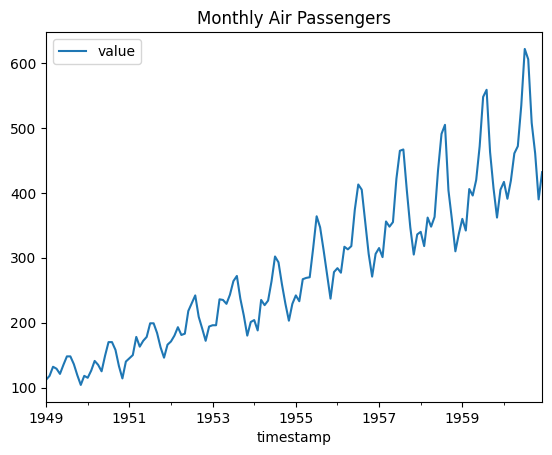

In [5]:
df.columns = ["timestamp", "value"]
df["timestamp"] = pd.to_datetime(df["timestamp"])

df.plot(x="timestamp", y="value", title="Monthly Air Passengers")
plt.show()


In [6]:
prediction_length = 12  # Forecast next 12 months
freq = "M"              # Monthly frequency

train_ds = ListDataset(
    [{"start": df["timestamp"].iloc[0], "target": df["value"].values[:-prediction_length]}],
    freq=freq
)

test_ds = ListDataset(
    [{"start": df["timestamp"].iloc[0], "target": df["value"].values}],
    freq=freq
)


/usr/local/lib/python3.11/dist-packages/gluonts/dataset/common.py:255: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  ProcessDataEntry(to_offset(freq), one_dim_target, use_timestamp),


In [7]:
estimator = DeepAREstimator(
    prediction_length=prediction_length,
    freq=freq,
    trainer=Trainer(epochs=10)
)

predictor = estimator.train(train_ds)


/usr/local/lib/python3.11/dist-packages/gluonts/time_feature/lag.py:104: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  offset = to_offset(freq_str)
/usr/local/lib/python3.11/dist-packages/gluonts/time_feature/_base.py:249: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  offset = to_offset(freq_str)
100%|██████████| 50/50 [00:02<00:00, 16.96it/s, epoch=10/10, avg_epoch_loss=3.88]


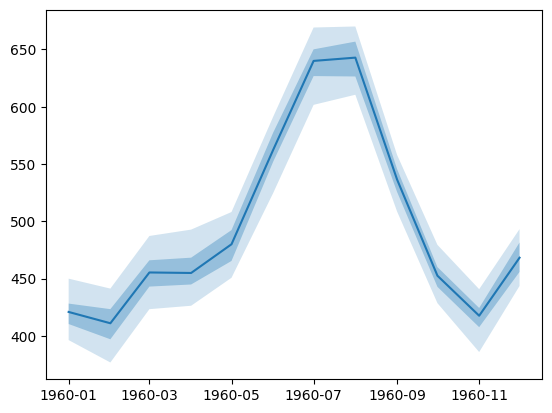

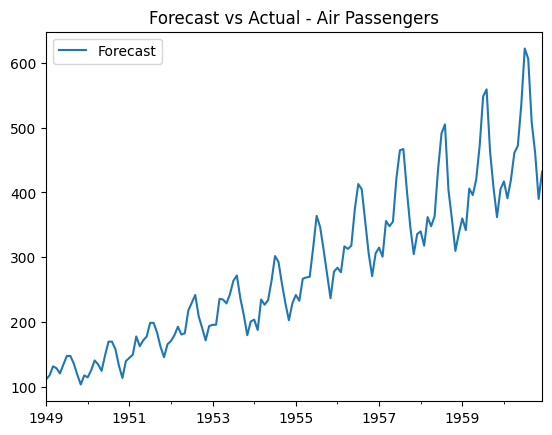

In [10]:
forecast.plot()
ts.plot()
plt.legend(["Forecast", "Actual"])
plt.title("Forecast vs Actual - Air Passengers")
plt.show()
